In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Sales=pd.read_csv("D:/Data Analysis/Mini Hackathon/Finals/Datasets/Sales.csv")
Distributer_Outlet_Mapping=pd.read_csv("D:/Data Analysis/Mini Hackathon/Finals/Datasets/Distributor Outlet Mapping.csv")

#Used only in the 2nd part
Outlet_Info=pd.read_csv("D:/Data Analysis/Mini Hackathon/Finals/Datasets/Outlet Info.csv")

In [3]:
#Importing the main dataset
df_main=pd.read_csv("D:/Data Analysis/Mini Hackathon/Finals/Datasets/Clustering datasets/MAIN_CLUSTER_DATASET.csv",index_col="outlet_id")
df_backup=pd.read_csv("D:/Data Analysis/Mini Hackathon/Finals/Datasets/Clustering datasets/MAIN_CLUSTER_DATASET.csv",index_col="outlet_id")

df=df_main
df.head()

,region,outlet_size,population_density,number_of_skus_sold,average_household_income,sales_quantity,expected_rainfall,Recency
outlet_id,,,,,,,,
1,outstation,1334,276,16,81704,572,6012.68,0
2,outstation,1336,276,16,81789,623,6701.60,0
3,outstation,1341,277,16,82046,500,6849.64,0
4,outstation,1025,239,13,66259,496,5467.00,4
5,upcountry,3965,646,35,59469,890,7873.35,0


## Info and Summary of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4200 entries, 1 to 4200
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    4200 non-null   object 
 1   outlet_size               4200 non-null   int64  
 2   population_density        4200 non-null   int64  
 3   number_of_skus_sold       4200 non-null   int64  
 4   average_household_income  4200 non-null   int64  
 5   sales_quantity            4200 non-null   int64  
 6   expected_rainfall         4200 non-null   float64
 7   Recency                   4200 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 295.3+ KB


In [5]:
df.describe()

,outlet_size,population_density,number_of_skus_sold,average_household_income,sales_quantity,expected_rainfall,Recency
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,1234.902381,1054.614048,23.613095,87428.865952,599.759524,5736.164581,0.810000
std,871.802510,1178.964095,12.053409,35295.742658,358.074805,1045.732589,1.220057
min,200.000000,100.000000,10.000000,30022.000000,90.000000,3209.360000,0.000000
25%,716.750000,255.000000,14.000000,59186.750000,352.000000,4831.160000,0.000000
50%,1110.500000,378.000000,19.000000,82305.000000,544.000000,5817.140000,0.000000
75%,1514.000000,1862.250000,30.000000,103943.250000,787.000000,6407.700000,1.000000
max,4000.000000,5800.000000,60.000000,174995.000000,1756.000000,9511.150000,8.000000


# EDA

## Histogram of the quantitative data

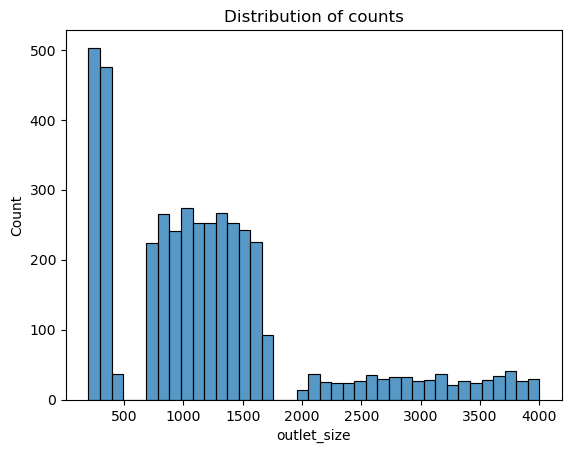

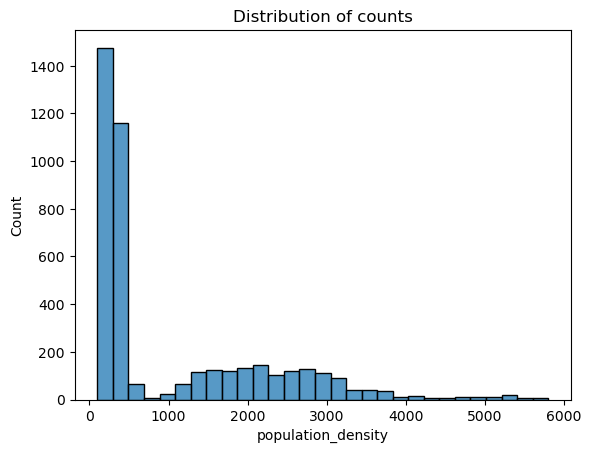

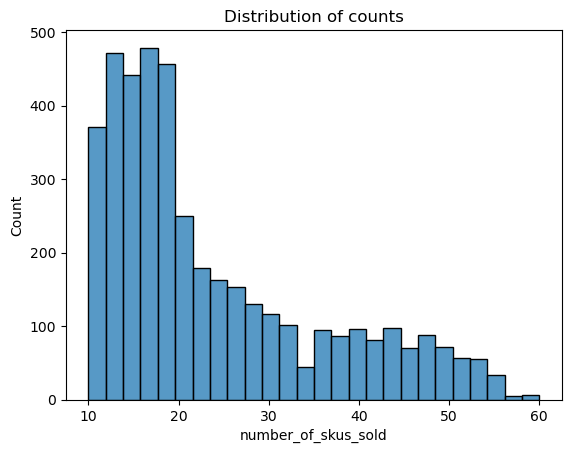

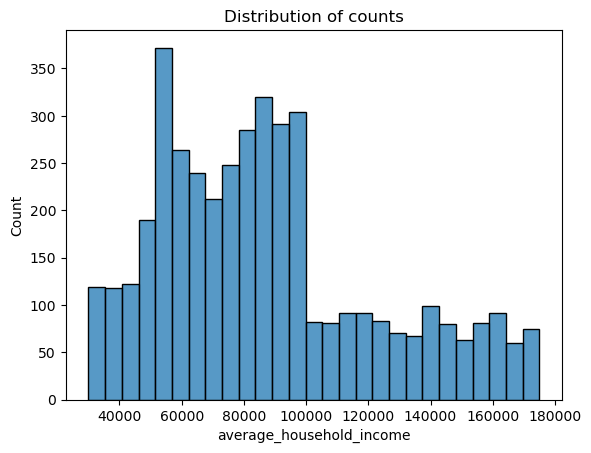

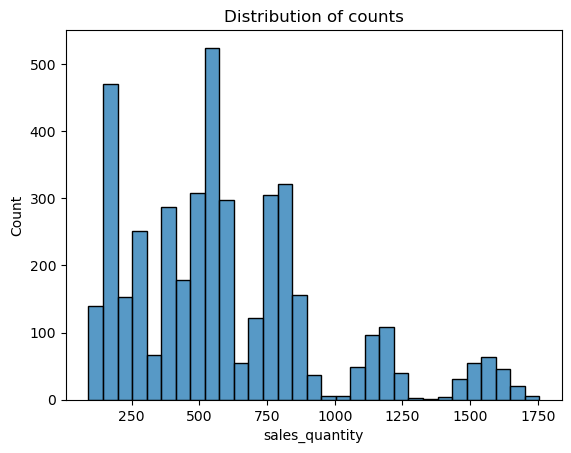

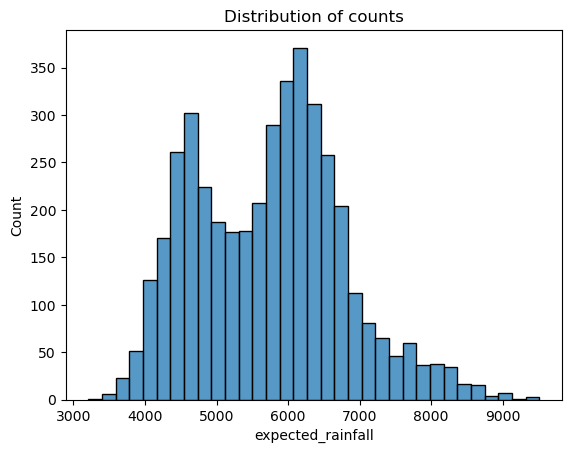

In [6]:
for i in df.columns[1:7]:
    sns.histplot(x=df[i])
    plt.title("Distribution of counts")
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


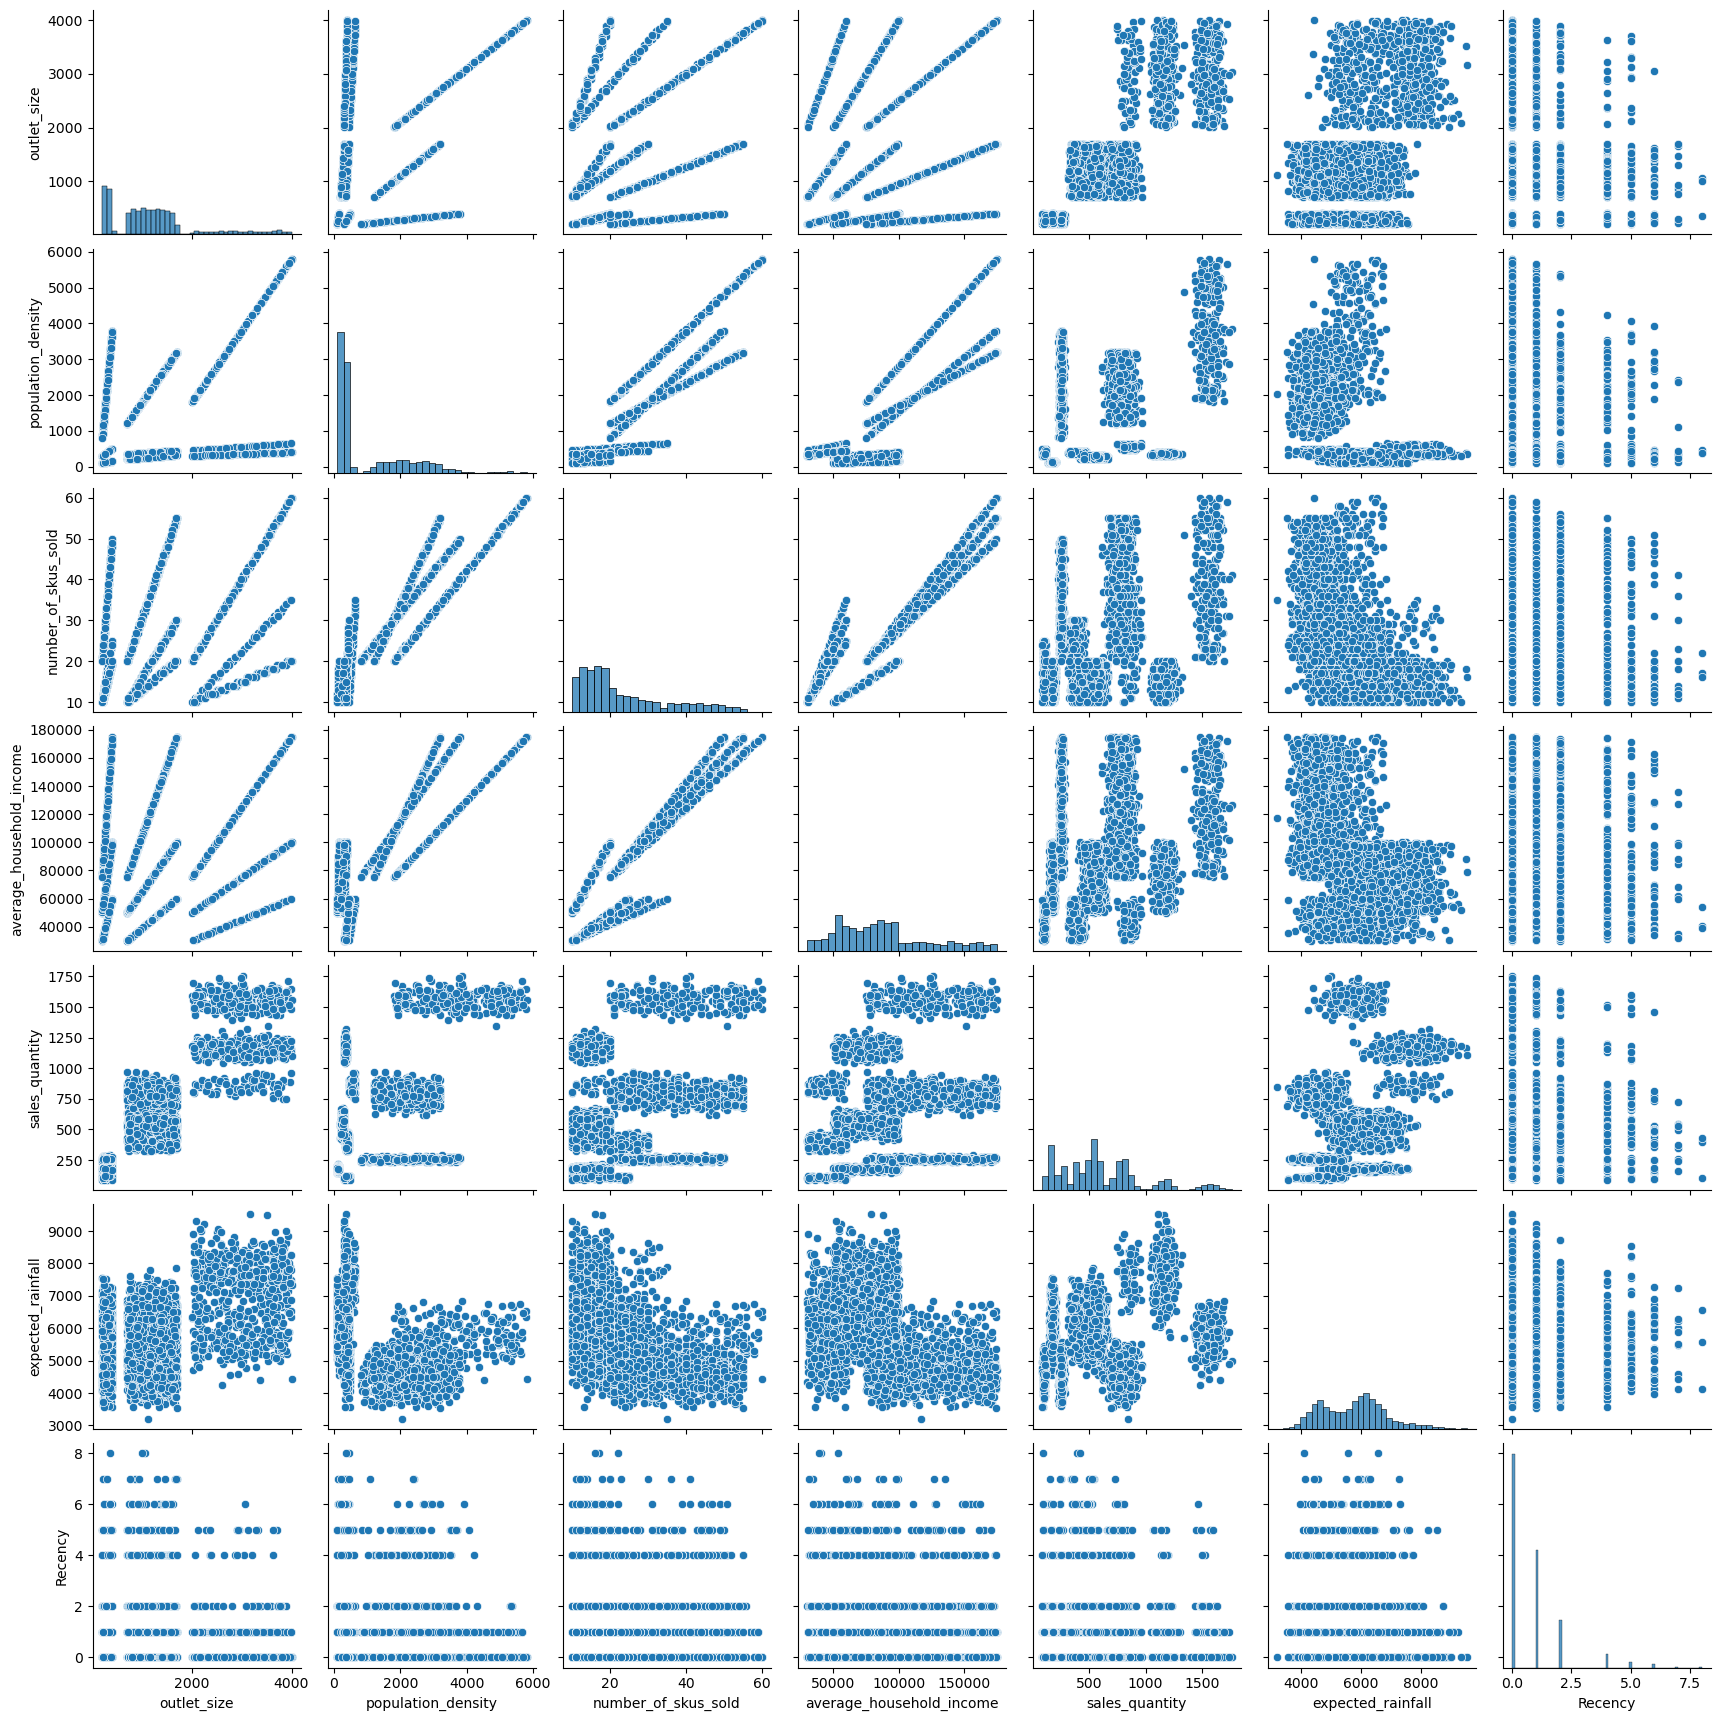

In [7]:
sns.pairplot(df)

Given the distribution of the outlt_size we hypothesize that there might be 3 clusters

Further we remove Recency as there was not a signifact distribution for us to consider for clustering

We can also observe that there are no visible linear relationships between the quantitative variables

## Correlation between the data

[Text(0.5, 1.0, 'Heatmap of Correlation')]

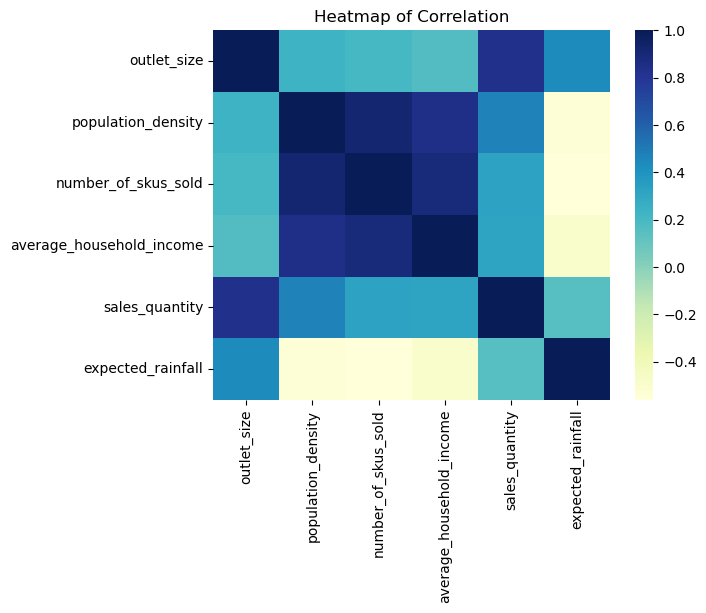

In [8]:
hm=sns.heatmap(df.loc[:,df.columns[1:7]].corr(),cmap="YlGnBu")
hm.set(title='Heatmap of Correlation')

## Barplots according to the region

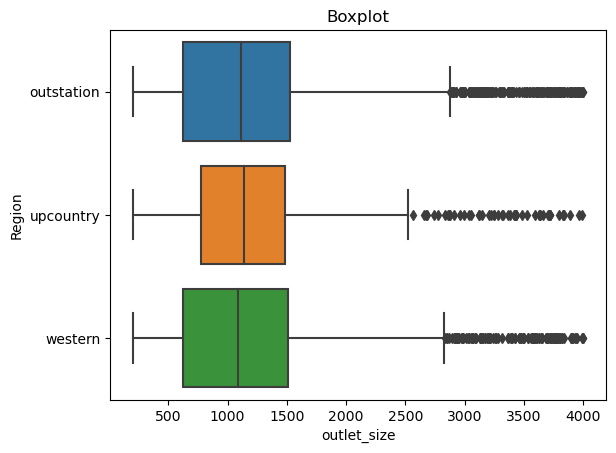

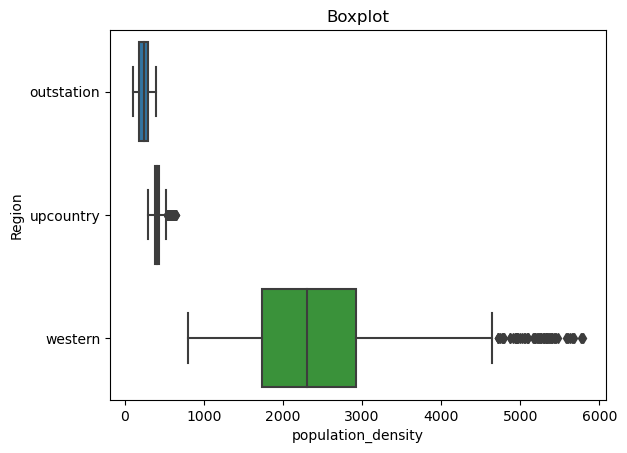

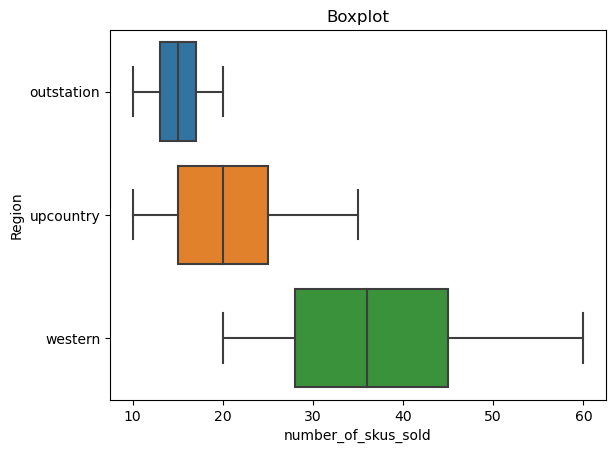

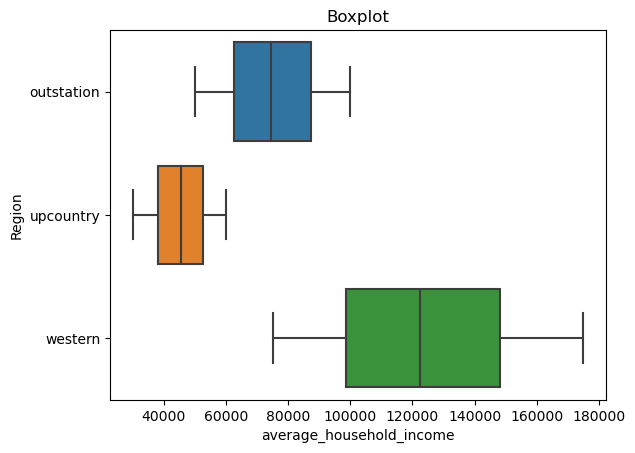

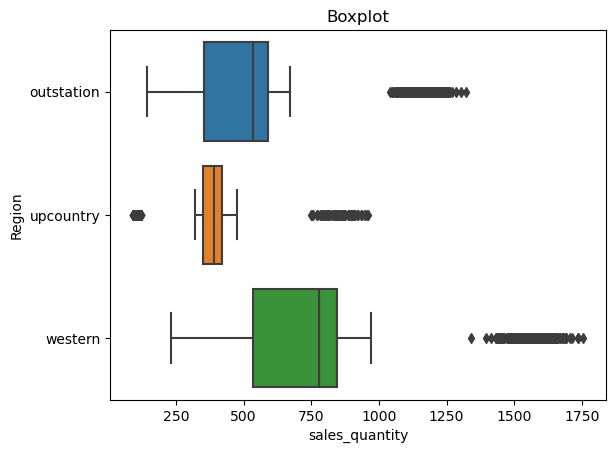

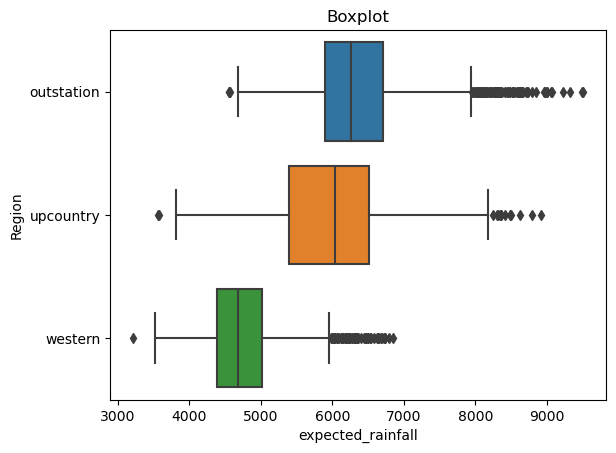

In [11]:
for i in df.columns[1:7]:
    ax=sns.boxplot(x=i, y="region", data=df)
    ax.set(xlabel=i, ylabel='Region', title='Boxplot')
    plt.show()

We can observe a significant variation in how the variables are distributed according to regions. This must be investigated later

Highly Correlated Variables
-pop_density and sku sold
-pop_densit and household income
-house hold income and sku sold
-outlet size and sales quantity

# Modelling on K means Clustering

In [12]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [13]:
df_clustering=df.loc[:,df.columns[1:7]]

In [14]:
#Standardize the data
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_clustering)

In [15]:
normal_df=normalize(scaled_df)
normal_df = pd.DataFrame(normal_df) 

In [16]:
normal_df.describe()

,0,1,2,3,4,5
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,-0.052388,-0.121924,-0.105766,-0.079190,-0.068072,0.011723
std,0.357640,0.406009,0.409427,0.406456,0.370195,0.444701
min,-0.740336,-0.767037,-0.697980,-0.842723,-0.701202,-0.932570
25%,-0.320171,-0.422140,-0.444234,-0.415100,-0.363162,-0.353501
50%,-0.088106,-0.285327,-0.207231,-0.086230,-0.119563,0.041835
75%,0.187932,0.364652,0.281679,0.262106,0.219909,0.393882
max,0.886160,0.596195,0.636233,0.602867,0.928684,0.906607


In [17]:
sse={}
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,max_iter=1000).fit(normal_df)
    sse[i]=kmeans.inertia_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [18]:
sse={}
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,max_iter=1000).fit(normal_df)
    sse[i]=kmeans.inertia_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

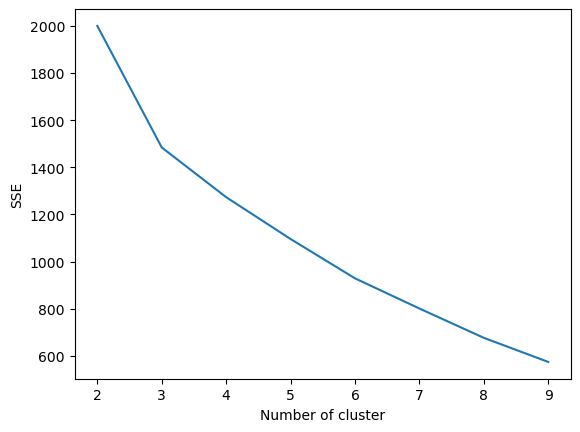

In [19]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

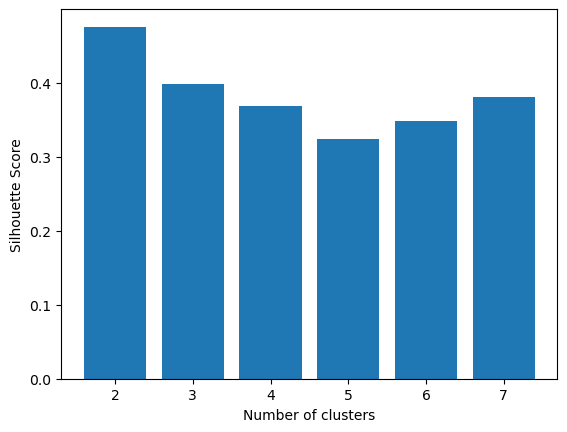

..............................................................
   Cluster  Silhoutte_Score
0        2         0.475583
1        3         0.397923
2        4         0.369067
3        5         0.323300
4        6         0.348417
5        7         0.380775


In [20]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normal_df, KMeans(n_clusters = n_cluster).fit_predict(normal_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print("..............................................................")
ss_df=pd.DataFrame({"Cluster":k,"Silhoutte_Score":silhouette_scores})
print(ss_df)

## K Mean Clustering using PCA

In [21]:
pca=PCA()
main_pca = pca.fit_transform(normal_df)
#principal_components = pca.fit_transform(normal_df)

In [22]:
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio
cvr_df=pd.DataFrame({"Principal Component":range(len(cumulative_variance_ratio)),"Proportion of Variation Explained":cumulative_variance_ratio})
print(cvr_df)

   Principal Component  Proportion of Variation Explained
0                    0                           0.556545
1                    1                           0.801405
2                    2                           0.894901
3                    3                           0.951372
4                    4                           0.995050
5                    5                           1.000000


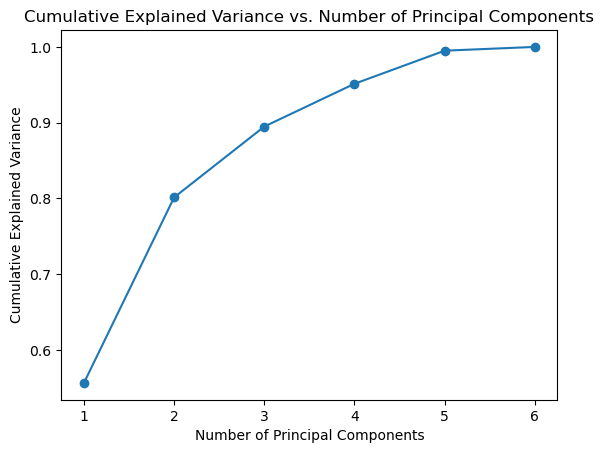

In [23]:
# Plotting the explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

Given that there are PC4 explains nearly 90% of the  data we can effectively use it for our k means clustering

In [24]:
pca=PCA(n_components=4)

In [25]:
reduced_X=pd.DataFrame(data=pca.fit_transform(normal_df),columns=['PCA1','PCA2','PCA3','PCA4'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

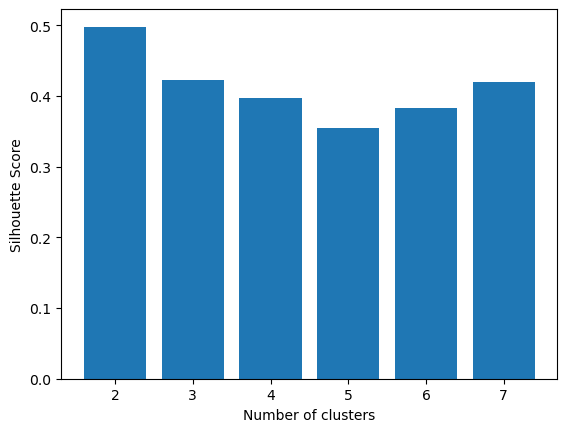

..............................................................
   Cluster  Silhoutte_Score
0        2         0.498085
1        3         0.422817
2        4         0.397368
3        5         0.355073
4        6         0.383457
5        7         0.419403


In [26]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(reduced_X, KMeans(n_clusters = n_cluster).fit_predict(reduced_X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print("..............................................................")
ss_df=pd.DataFrame({"Cluster":k,"Silhoutte_Score":silhouette_scores})
print(ss_df)

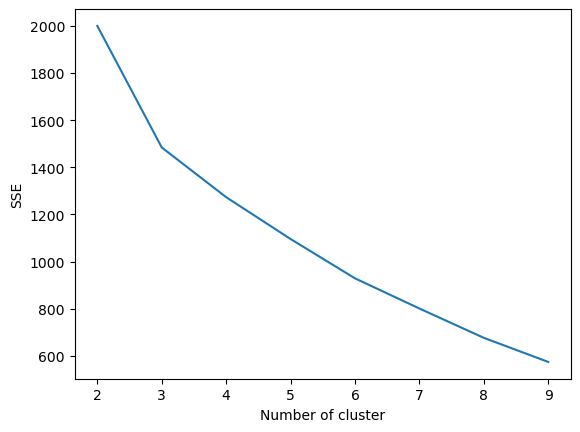

In [27]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_X)
identified_clusters = kmeans.fit_predict(reduced_X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


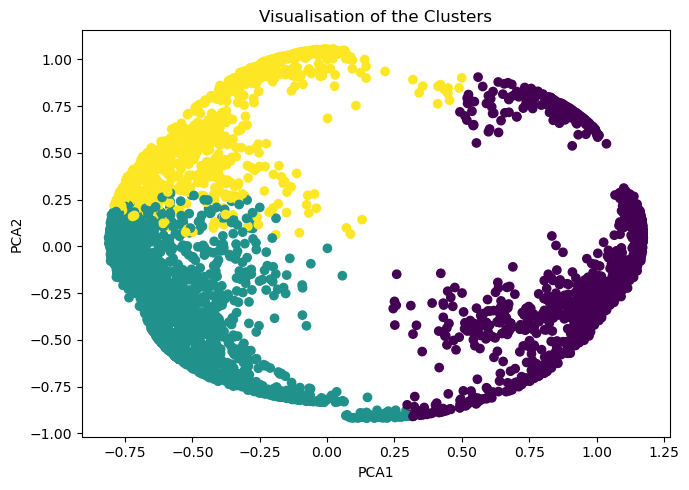

In [32]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=identified_clusters)
#plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualisation of the Clusters')
plt.tight_layout()

In [29]:
kmeans.labels_
df["Cluster"]=kmeans.labels_
df["Cluster"]=df["Cluster"].astype("str")

In [34]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outlet_size               4200 non-null   int64  
 1   population_density        4200 non-null   int64  
 2   number_of_skus_sold       4200 non-null   int64  
 3   average_household_income  4200 non-null   int64  
 4   sales_quantity            4200 non-null   int64  
 5   expected_rainfall         4200 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 197.0 KB


<AxesSubplot:xlabel='population_density', ylabel='sales_quantity'>

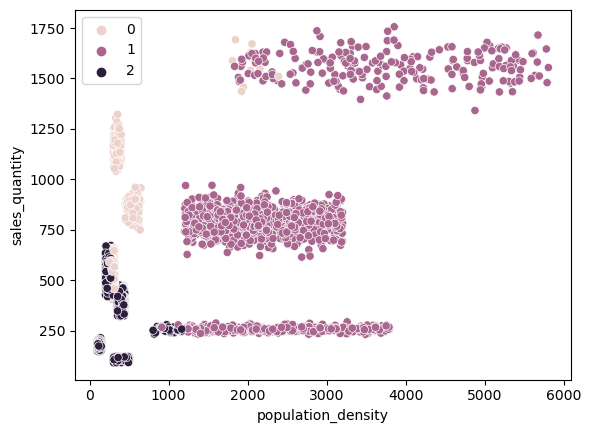

In [35]:
sns.scatterplot(x='population_density',y='sales_quantity',data=df_clustering,hue=kmeans.labels_)

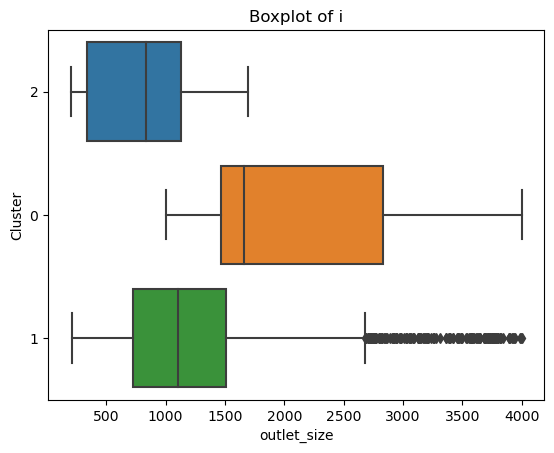

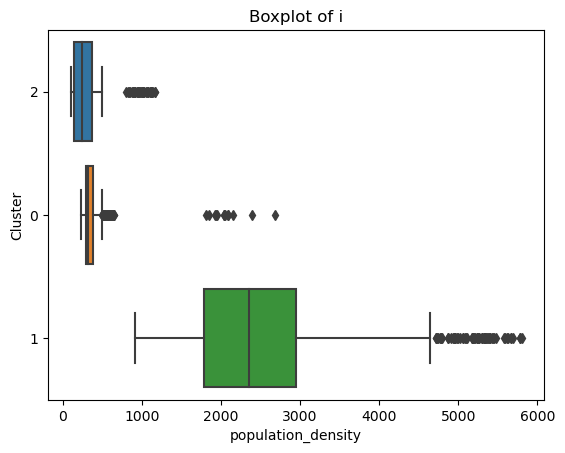

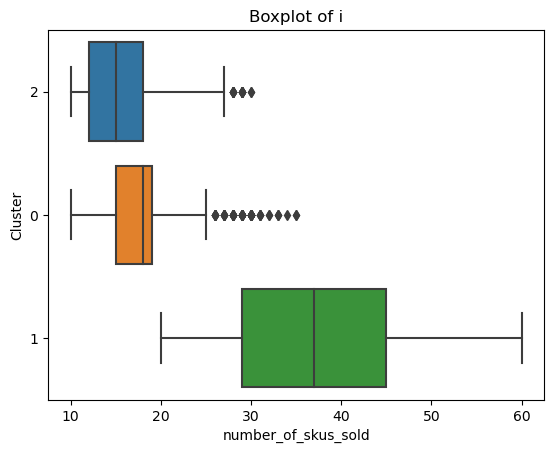

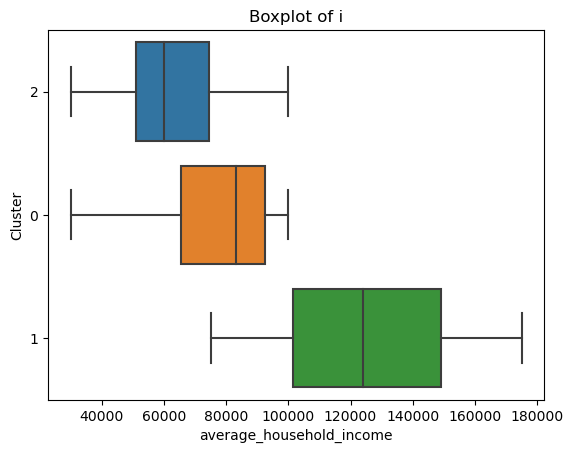

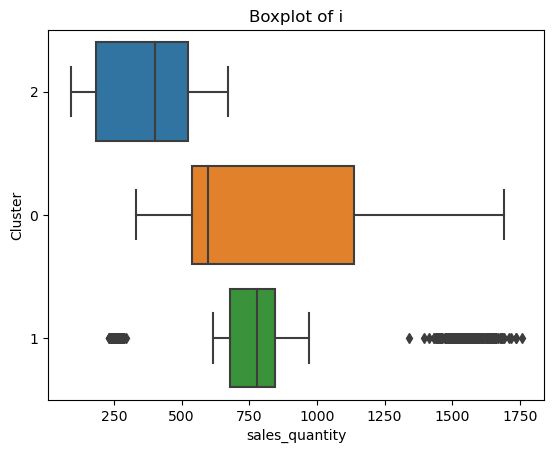

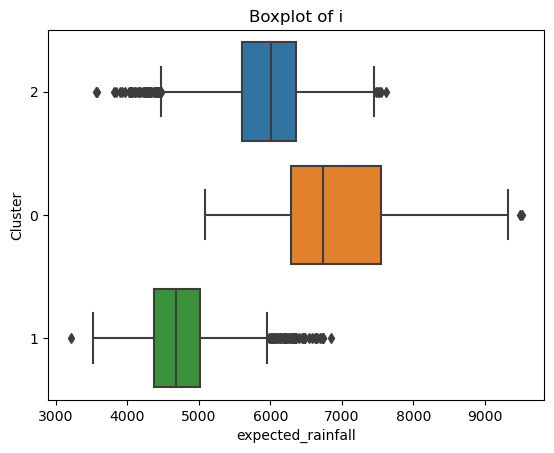

In [38]:
for i in df.columns[2:8]:
    ax=sns.boxplot(x=i, y="Cluster", data=df)
    ax.set(xlabel=i, ylabel='Cluster', title='Boxplot of i')
    plt.show()

# Visualising the data

In [ ]:
#kmeans=KMeans(n_clusters=3,max_iter=1000).fit(normal_df)

In [ ]:
df.describe()

## Distribution of customers according to the region

In [ ]:
pd.crosstab(index=df["region"],columns="count")

In [ ]:
#Turning Outlet type into a string
df["outlet_id"]=df["outlet_id"].astype("str")

## Distribution of Cluster

In [ ]:
sns.countplot(x='Cluster',data=df)

## Checking for the 5 number summary of the groups by sales quantity

## Quantitatives Distributed along the Cluster

In [ ]:

print(df.pivot_table(index="Cluster",values="outlet_id",columns="region", aggfunc='count'))
print("......................")
print(df.groupby(["Cluster"]).sales_quantity.agg([np.mean,np.std,min,np.median,max]))
print(".........................................................................")
print(df.groupby(["Cluster"]).average_household_income.agg([np.mean,np.std,min,np.median,max]))
print(".....................................................................................")
print(df.groupby(["region"]).sales_quantity.agg([np.mean,np.std,min,np.median,max]))
print(".........................................................................")
print(df.groupby(["region"]).average_household_income.agg([np.mean,np.std,min,np.median,max]))

In [ ]:
print(df.pivot_table(index="Cluster",values="outlet_id",columns="region", aggfunc='count'))
print("......................")